In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
data = np.load('data_created\\y_test_true_and_pred.npz', allow_pickle=True)

In [3]:
y_true = data['arr_0']
y_pred = data['arr_1']

# Total Accuracy 

In [20]:
ex = 0
tot = 0
for i in range(len(y_true)):

    ex += np.sum(np.array(y_true[i]) == np.array(y_pred[i]))
    tot += len(y_true[i])


In [23]:
print('''  
Correct: {}
Total: {}
Accuracy: {}
'''.format(ex,tot, ex/tot))

  
Correct: 2235
Total: 2554
Accuracy: 0.875097885669538



In [4]:
# exact sentences
np.mean(y_true == y_pred)

0.24691358024691357

# Joinplot Number Errors/Length sentence

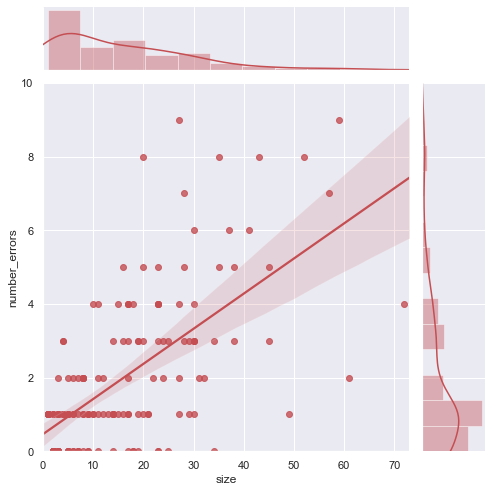

In [5]:
nb_err = []
size = []
for i in range(len(y_true)):
    size += [len(y_true[i])]
    nb_err += [np.sum(np.array(y_true[i]) != np.array(y_pred[i]))]
    
data = pd.DataFrame({'number_errors':nb_err , 'size':size})

sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("size", "number_errors", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, np.max(size)+1), ylim=(0, np.max(nb_err)+1),
                  color="r", height=7)

# Joinplot Number Correct/Length sentence

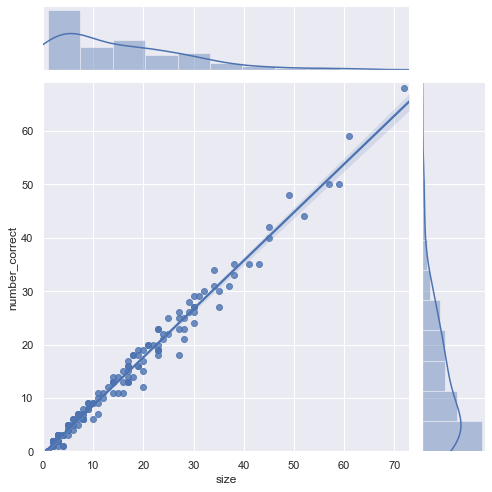

In [6]:
nb_corr = []
size = []
for i in range(len(y_true)):
    size += [len(y_true[i])]
    nb_corr += [np.sum(np.array(y_true[i]) == np.array(y_pred[i]))]
    
data = pd.DataFrame({'number_correct':nb_corr , 'size':size})

sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("size", "number_correct", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, np.max(size)+1), ylim=(0, np.max(nb_corr)+1),
                  color="b", height=7)

# Joinplot Accuracy/Length sentence

In [7]:
acc = []
size = []
for i in range(len(y_true)):
    size += [len(y_true[i])]
    acc += [np.mean(np.array(y_true[i]) == np.array(y_pred[i]))]
    
data = pd.DataFrame({'accuracy':acc , 'size':size})

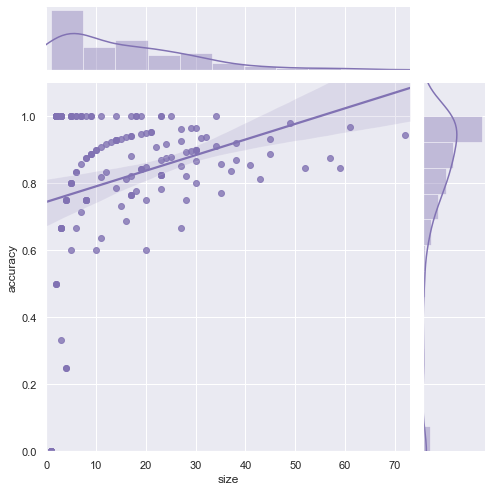

In [8]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("size", "accuracy", data=data,
                  kind="reg", truncate=False,
                  xlim=(0, np.max(size)+1), ylim=(0, 1.1),
                  color="m", height=7)

# Error Frequency 

In [9]:
dic_err = defaultdict(int)
for i in range(len(y_true)):
    for j in range(len(y_true[i])):
        if y_true[i][j] != y_pred[i][j]:
            it = y_true[i][j] +' -> ' +  str(y_pred[i][j])
            if it in dic_err.keys():
                dic_err[it] = dic_err[it] + 1
            else:
                dic_err[it] = 1

val_array = np.array(list(dic_err.values()))
key_array = np.array(list(dic_err.keys()))
data = pd.DataFrame({'val':val_array , 'key':key_array})
data = data.sort_values("val", ascending=False)[data.val >1]

C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


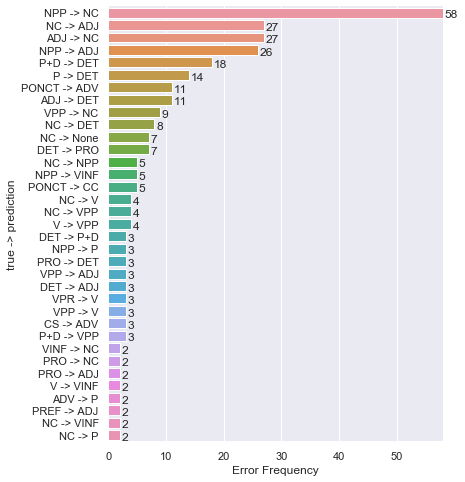

In [10]:
def show_values_on_bars(axs, h_v="h", space=0.4):
    def _show_on_single_plot(ax):

        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

f, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("pastel")
sns.barplot(x="val", y="key", data=data,
            label="key")

ax.set(xlim=(0, 58), ylabel="true -> prediction",
       xlabel="Error Frequency")
sns.despine(left=True, bottom=True)

show_values_on_bars(ax, "h", 0.3)

# Correct Frequency

In [11]:
dic_err = defaultdict(int)
for i in range(len(y_true)):
    for j in range(len(y_true[i])):
        if y_true[i][j] == y_pred[i][j]:
            it = y_true[i][j] +' -> ' +  str(y_pred[i][j])
            if it in dic_err.keys():
                dic_err[it] = dic_err[it] + 1
            else:
                dic_err[it] = 1

val_array = np.array(list(dic_err.values()))
key_array = np.array(list(dic_err.keys()))
data = pd.DataFrame({'val':val_array , 'key':key_array})
data = data.sort_values("val", ascending=False)[data.val >1]

C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


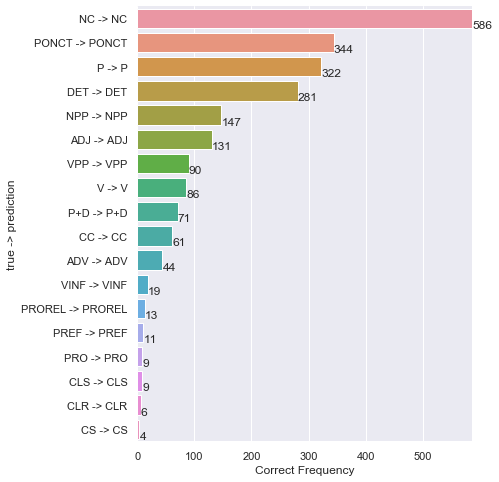

In [12]:
def show_values_on_bars(axs, h_v="h", space=0.4):
    def _show_on_single_plot(ax):

        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

f, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("dark")
sns.barplot(x="val", y="key", data=data,
            label="key")

ax.set(xlim=(0, np.max(val_array)), ylabel="true -> prediction",
       xlabel="Correct Frequency")
sns.despine(left=True, bottom=True)

show_values_on_bars(ax, "h", 0.3)

# Error Frequency / Number Occurence 

In [37]:
dic_err = defaultdict(int)
dic_occ = defaultdict(int)
for i in range(len(y_true)):
    for j in range(len(y_true[i])):
        it = y_true[i][j] 
        if it != y_pred[i][j]:
            if it in dic_err.keys():
                dic_err[it] = dic_err[it] + 1
            else:
                dic_err[it] = 1
        if it in dic_occ.keys():
            dic_occ[it] = dic_occ[it] + 1
        else:
            dic_occ[it] = 1

dir_freq = defaultdict(int)
for j in dic_occ.keys():
    if j in dic_err.keys():
        dir_freq[j] = dic_err[j]/dic_occ[j]
    else:
        dir_freq[j] = 0
        
val_array = np.array(list(dir_freq.values()))
key_array = np.array(list(dir_freq.keys()))
data = pd.DataFrame({'val':val_array , 'key':key_array}).sort_values("val", ascending=False)

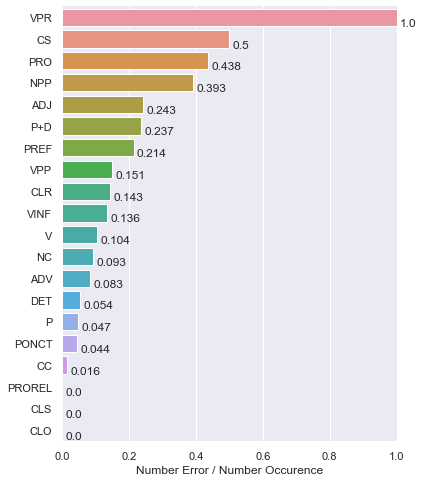

In [47]:
def show_values_on_bars(axs, h_v="h", space=0.4):
    def _show_on_single_plot(ax):

        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = np.around(p.get_width(), 3)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
f, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("dark")
sns.barplot(x="val", y="key", data=data,
            label="key")

ax.set(xlim=(0, np.max(val_array)), ylabel="",
       xlabel="Number Error / Number Occurence")
sns.despine(left=True, bottom=True)

show_values_on_bars(ax, "h", 0.01)